In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train_img_data = np.load(r"C:\Users\kaanan\Desktop\Noses\train_images.npy", allow_pickle = True)
train_bb_data = np.load(r"C:\Users\kaanan\Desktop\Noses\train_bb_data.npy", allow_pickle = True)
val_img_data  = np.load(r"C:\Users\kaanan\Desktop\Noses\val_images.npy", allow_pickle = True)
val_bb_data = np.load(r"C:\Users\kaanan\Desktop\Noses\val_bb_data.npy", allow_pickle = True)
test_img_data  = np.load(r"C:\Users\kaanan\Desktop\Noses\test_images.npy", allow_pickle = True)
test_bb_data = np.load(r"C:\Users\kaanan\Desktop\Noses\test_bb_data.npy", allow_pickle = True)

In [3]:
def get_labels(bb_data, threshold=.3):
    labels = []
    for data_frame in bb_data:
        if data_frame is not None:
            percent = float(
                data_frame
                .percent_seal
                .max()
                )
            if percent > threshold:
                labels.append(1)
            else:
                labels.append(0)
        else:
            labels.append(0)
    return np.array(labels)

def generate_predictions(model, image_list):
    raw_preds = (
        model
        .predict(image_list / 255)
        .flatten()
        )
    predictions = np.array(
        [1 if pred > .5 else 0 for pred in raw_preds]
    )
    return predictions

def display_results(true_labels, predicted_labels):
    cm_train = confusion_matrix(true_labels, predicted_labels)
    ConfusionMatrixDisplay(confusion_matrix=cm_train).plot()
    tn = cm_train[0][0]
    tp = cm_train[1][1]
    fn = cm_train[1][0]
    fp = cm_train[0][1]

    precision = tp / (fp + tp)
    recall = tp / (fn + tp)
    print("Accuracy:", (tn + tp) / (tn + tp + fn + fp))
    print("Precision:", precision)
    print("Recall:", recall)

def evaluate_model(img_data, bb_data, model, threshold=.3):
    true_labels = get_labels(bb_data, threshold=threshold)
    predicted_labels = generate_predictions(model, img_data)
    display_results(true_labels, predicted_labels)

In [4]:
model_path = r"C:\Users\kaanan\Desktop\Noses\FullTrainModel2"
cnn = tf.keras.models.load_model(model_path)

2485/2485 [==============================] - 1268s 509ms/step
Accuracy: 0.985937106918239
Precision: 0.8829505767806117
Recall: 0.9985637342908438


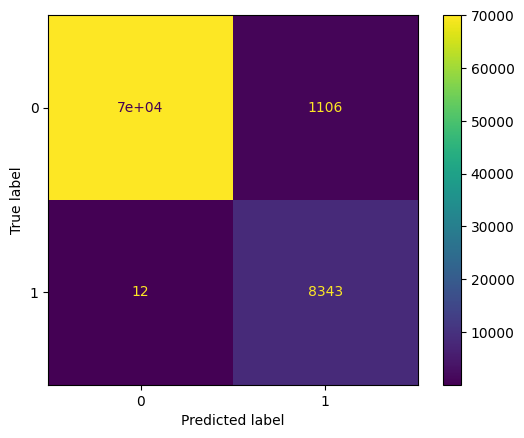

In [5]:
evaluate_model(train_img_data, train_bb_data, cnn)

646/646 [==============================] - 324s 502ms/step
Accuracy: 0.9155781325592647
Precision: 0.6069819819819819
Recall: 0.8606786427145708


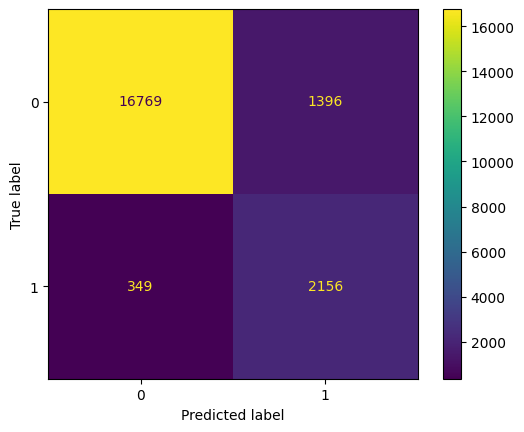

In [6]:
evaluate_model(val_img_data, val_bb_data, cnn)

795/795 [==============================] - 388s 487ms/step
Accuracy: 0.9284591194968553
Precision: 0.6283783783783784
Recall: 0.8611111111111112


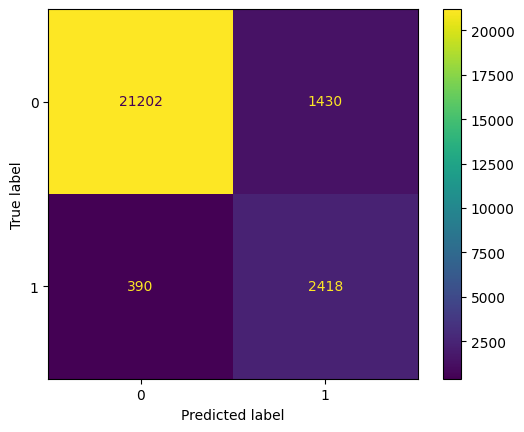

In [7]:
evaluate_model(test_img_data, test_bb_data, cnn)